In [1]:
import sys
print(sys.executable)
print(sys.version)

c:\Users\Elena\.vscode\fmnist_project\tf_env\Scripts\python.exe
3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]


In [12]:
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [7]:
import pandas as pd

# Загружаем тренировочную выборку
df_train = pd.read_csv(r"C:\Users\Elena\Documents\2025\МИФИ 2 сем\Skillfactory\Введение в глубокое обучение\fashion-mnist-testn\fmnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Id
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0,2
3,0,0,0,0,1,2,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
# Смотрим минимальные и максимальные значения
print("Min:", X_train.min())
print("Max:", X_train.max())

Min: nan
Max: nan


In [ ]:
# Поскольку значения не числовые, заполняю их нулями
df_train = df_train.fillna(0)

In [ ]:
# Снова проверяю значения
print("Min:", X_train.min())
print("Max:", X_train.max())

Min: 0.0
Max: 255.0


In [ ]:
# Отделяю метки (labels)
y_train = df_train['label'].values

# Убираю 'label' и 'id' из признаков
y_train = df_train["label"].values
X_train = df_train.drop(columns=["label", "Id"]).values

# Преобразую в формат (N, 28, 28, 1) — как требует Keras CNN
X_train = X_train.reshape(-1, 28, 28, 1)

In [ ]:
# Разделение на обучающую и валидационную выборки
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Модель CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция и обучение
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_tr, y_tr, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15


c:\Users\Elena\.vscode\fmnist_project\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6374 - loss: 8.3327 - val_accuracy: 0.8198 - val_loss: 0.5422
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8582 - loss: 0.4203 - val_accuracy: 0.8586 - val_loss: 0.4665
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8883 - loss: 0.3100 - val_accuracy: 0.8697 - val_loss: 0.4293
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9123 - loss: 0.2425 - val_accuracy: 0.8574 - val_loss: 0.4414
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9154 - loss: 0.2293 - val_accuracy: 0.8515 - val_loss: 0.4687
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9292 - loss: 0.1948 - val_accuracy: 0.8703 - val_loss: 0.4894
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9354 - loss: 0.1802 - val_accuracy: 0.8703 - val_loss: 0.4936
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9371 - loss: 0.1724 - val_accuracy: 0.8709 - val_

In [47]:
model.fit(X_tr, y_tr, epochs=15, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9684 - loss: 0.0888 - val_accuracy: 0.8674 - val_loss: 0.6517
Epoch 2/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9717 - loss: 0.0775 - val_accuracy: 0.8674 - val_loss: 0.6728
Epoch 3/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9697 - loss: 0.0851 - val_accuracy: 0.8656 - val_loss: 0.6914
Epoch 4/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9747 - loss: 0.0780 - val_accuracy: 0.8738 - val_loss: 0.6857
Epoch 5/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9728 - loss: 0.0778 - val_accuracy: 0.8762 - val_loss: 0.7718
Epoch 6/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9789 - loss: 0.0550 - val_accuracy: 0.8697 - val_loss: 0.8494
Epoch 7/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9800 - loss: 0.0587 - val_accuracy: 0.8609 - val_loss: 0.8814
Epoch 8/15
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9746 - loss: 0.0741 - val_accuracy: 0.

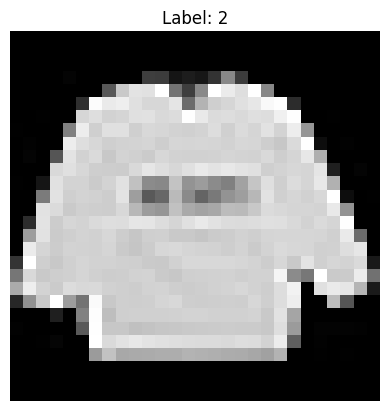

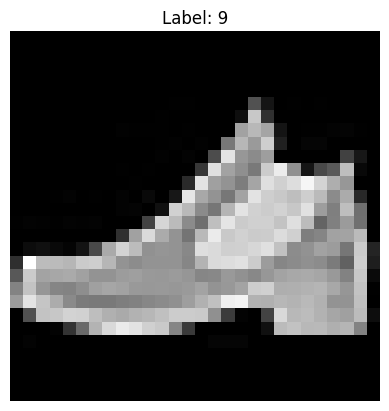

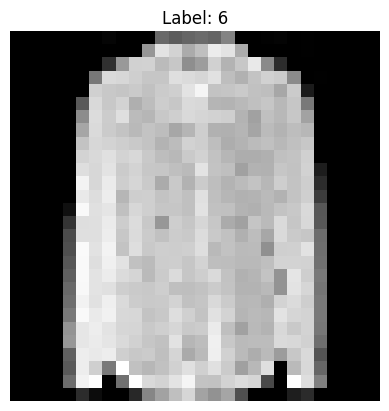

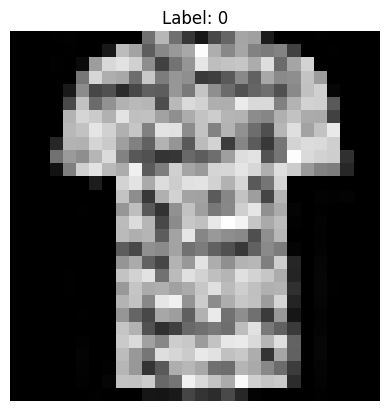

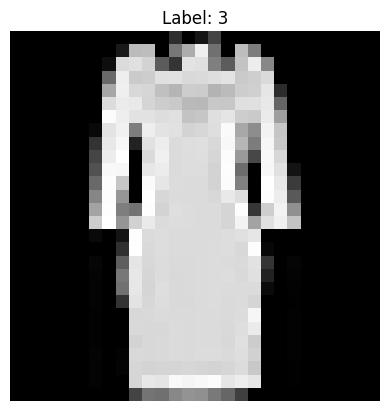

In [ ]:
# смотрю, отображается ли одежда
import matplotlib.pyplot as plt

for i in range(5):
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
    plt.show()

In [ ]:
# Загрузка тестовой выборки для проверки, насколько обучилась модель
df_test = pd.read_csv(r"C:\Users\Elena\Documents\2025\МИФИ 2 сем\Skillfactory\Введение в глубокое обучение\fashion-mnist-testn\fmnist_test.csv")

# Сохраняю id
ids = df_test["Id"].values

# Убираю колонку Id
X_test = df_test.drop(columns=["Id"]).values.astype("float32")

# преобразую форму
X_test = X_test.reshape(-1, 28, 28, 1)

# Предсказания модели
y_pred = model.predict(X_test)
labels = np.argmax(y_pred, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Сохраняю результат для загрузки на Kaggle
submission = pd.DataFrame({
    "Id": ids,
    "label": labels  # ← важно: именно 'label', а не 'Predicted'
})

submission.to_csv(r"C:\Users\Elena\Documents\2025\МИФИ 2 сем\Skillfactory\Введение в глубокое обучение\fashion-mnist-testn\submission.csv", index=False)

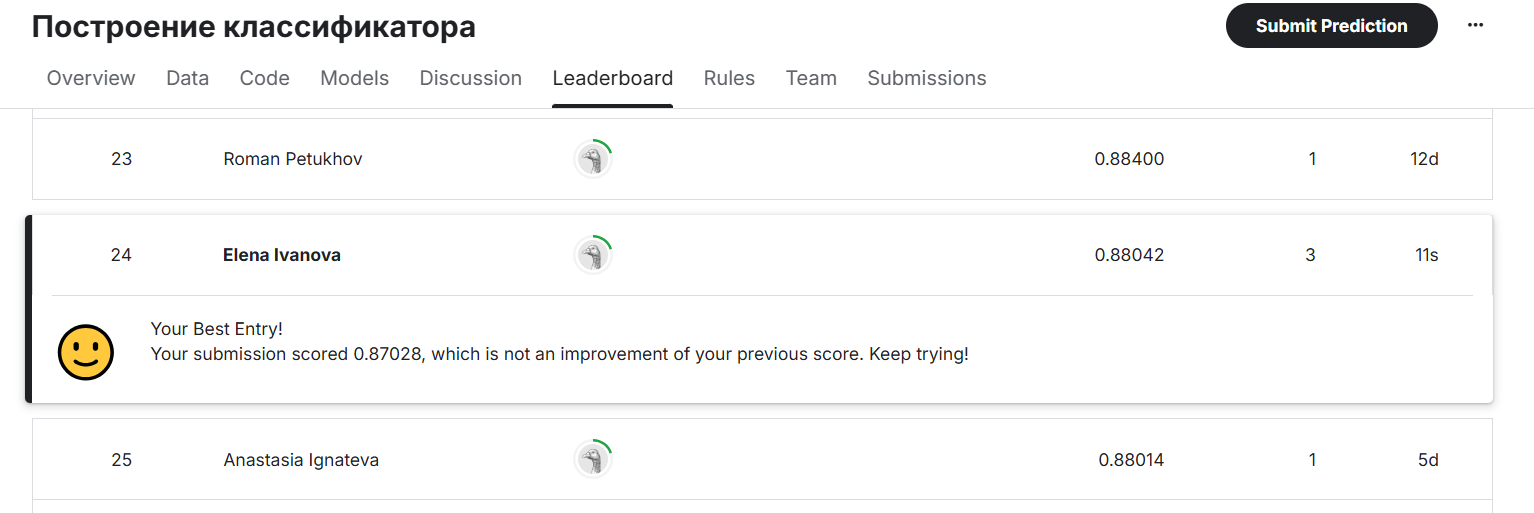